In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')

In [14]:
ar = pd.read_csv('countrycluster.csv')

In [15]:
ar

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


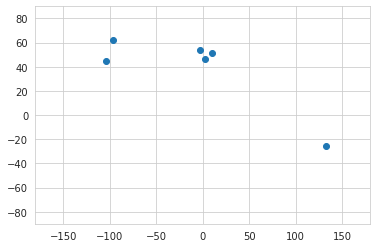

In [16]:
plt.scatter(ar['Longitude'],ar['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [17]:
x = ar.iloc[:,1:3].values

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans = KMeans(n_clusters=3)

In [20]:
kmeans.fit(x)

KMeans(n_clusters=3)

In [21]:
identified_cluster = kmeans.fit_predict(x)

In [22]:
identified_cluster

array([2, 2, 0, 0, 0, 1], dtype=int32)

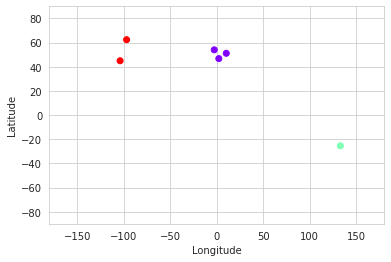

In [23]:
plt.scatter(ar['Longitude'],ar['Latitude'],c=identified_cluster,cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()


# WCSS and ELBOW Method

In [25]:
wcss = []
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_inter = kmeans.inertia_
  wcss.append(wcss_inter)

In [26]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

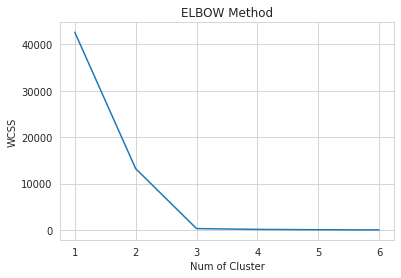

In [33]:
plt.plot(range(1,7),wcss)
plt.title('ELBOW Method')
plt.xlabel('Num of Cluster')
plt.ylabel('WCSS')
plt.show()

# MeanShift

In [28]:
from sklearn.cluster import MeanShift

In [29]:
ms = MeanShift()

In [30]:
ms.fit(x)

MeanShift()

In [31]:
identified_clusters = ms.fit_predict(x)

In [34]:
identified_clusters

array([4, 0, 3, 1, 2, 5])

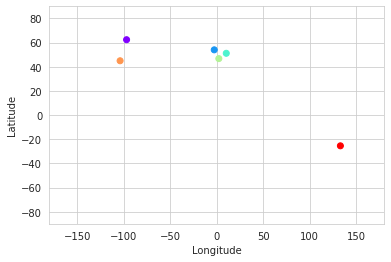

In [32]:
plt.scatter(ar['Longitude'],ar['Latitude'],c=identified_clusters,cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()